In [2]:
import numpy as np
rng = np.random.default_rng()
import cmdstanpy
import arviz as az
import iqplot
import bebi103
import bokeh.io
bokeh.io.output_notebook()

Loading BokehJS ...

In [3]:
# "Hello world" is sampling out of a standard normal distribution
x = rng.normal(0, 1, 4000)
x

array([ 0.48657062, -0.77069054, -0.75284535, ...,  0.34520824,
        0.35466822, -0.62452898], shape=(4000,))

# Stan
The order of blocks is:
- functions - the functions you want to use
- data - values that do not change in the sampling. Anything the user wants to input in
- transformed data - anything you want to transform on the data
- parameters - used for the sampler (like beta)
- transformed parameters
- model - the prob dist out of which we're drawing the samples
- generated quantities


- The order of the blocks is a must!
- You must have at least one block but you don't need all of them
- Each block sees the one before it but not after it.

## syntax 
- "real" is a float
- end with ;
- commenting: open with `/*` and close with `*/` or use `//` for single line comments

In [7]:
sm = cmdstanpy.CmdStanModel(stan_file='hello_world.stan')

11:56:52 - cmdstanpy - INFO - compiling stan file /home/tomerantman/projects/wis-stats/intro_to_stan/hello_world.stan to exe file /home/tomerantman/projects/wis-stats/intro_to_stan/hello_world
11:57:00 - cmdstanpy - INFO - compiled model executable: /home/tomerantman/projects/wis-stats/intro_to_stan/hello_world


In [13]:
# let's sample out of this
samples = sm.sample(chains=4,  iter_sampling=1000)
# chains - number of "walkers"
# iter_sampling - number of counted steps
# warmup - the "exploring" steps taken before the "counting" starts

samples.summary()

12:08:50 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:08:50 - cmdstanpy - INFO - CmdStan done processing.


,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
lp__,-0.510081,0.017447,0.720946,0.321331,-1.93319,-0.238479,-0.002019,1661.66,2326.23,1.00149
x,-0.042941,0.024710,1.009240,1.005560,-1.70459,-0.067119,1.635520,1684.53,2527.69,1.00109


In [14]:
samples = az.from_cmdstanpy(samples)

In [ ]:
samples.posterior['x'] # numpy where each row is a chain and each column is a step

<xarray.DataArray 'x' (chain: 4, draw: 1000)> Size: 32kB
array([[-1.76780e+00, -1.25346e+00, -1.11874e+00, ...,  1.96661e+00,
         1.49928e+00, -5.00129e-01],
       [-1.35746e-01,  8.77646e-01, -7.69573e-01, ...,  1.22838e+00,
        -1.02090e+00, -1.21387e+00],
       [ 4.48609e-04,  4.48609e-04,  1.19455e-01, ...,  1.14577e+00,
         7.91060e-01,  4.31922e-01],
       [ 1.22129e+00,  1.14953e+00,  5.91159e-01, ...,  6.55292e-01,
         7.38228e-01,  7.38228e-01]], shape=(4, 1000))
Coordinates:
  * chain    (chain) int64 32B 0 1 2 3
  * draw     (draw) int64 8kB 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999

In [16]:
bokeh.io.show(
    iqplot.histogram(
        samples.posterior['x'].values.ravel()
    )
)


# We can sample out of posteriors!
$$
y_i \sim Exp_{on}(\beta) \quad \forall i \\
\beta \sim \text{HalfNorm}(0,10)
$$
We can try different sampling sizes when building `y` to see how the posterior changes and how it converges to the true value of beta. <br>
This can help us understand how many samples we need to get a good estimate of beta.

In [17]:
sm = cmdstanpy.CmdStanModel(stan_file='halfnormal_demo.stan')

12:26:02 - cmdstanpy - INFO - compiling stan file /home/tomerantman/projects/wis-stats/intro_to_stan/halfnormal_demo.stan to exe file /home/tomerantman/projects/wis-stats/intro_to_stan/halfnormal_demo
12:26:15 - cmdstanpy - INFO - compiled model executable: /home/tomerantman/projects/wis-stats/intro_to_stan/halfnormal_demo


In [31]:
# we need to make a DICTIONARY with the data to pass to stan. 
beta_true = 0.3
y = rng.exponential(1 / beta_true, 2000) 
data = {'N': len(y), 'y': y}
# N - number of samples
# y - the samples
# the names need to match the names in the stan file

In [32]:
samples = sm.sample(data=data, chains=4, iter_sampling=1000)
samples.summary()

12:39:43 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

12:39:43 - cmdstanpy - INFO - CmdStan done processing.
12:39:43 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in 'halfnormal_demo.stan', line 19, column 4 to column 27)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in 'halfnormal_demo.stan', line 19, column 4 to column 27)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in 'halfnormal_demo.stan', line 19, column 4 to column 27)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in 'halfnormal_demo.stan', line 19, column 4 to column 27)
	Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in 'halfnormal_demo.stan', line 19, column 4 to column 27)
Exception: exponential_lpdf: Inverse scale parameter is 0, but must be positive finite! (in 'halfnormal_demo.stan', line 19, column 4 t

,Mean,MCSE,StdDev,MAD,5%,50%,95%,ESS_bulk,ESS_tail,R_hat
lp__,-4422.77000,0.019032,0.707493,0.296520,-4424.300000,-4422.490000,-4422.28000,1672.88,1710.87,1.00206
beta_,0.29805,0.000159,0.006666,0.006545,0.287102,0.297864,0.30931,1758.81,1526.80,1.00216


array([[<Axes: title={'center': 'beta_'}>,
        <Axes: title={'center': 'beta_'}>]], dtype=object)

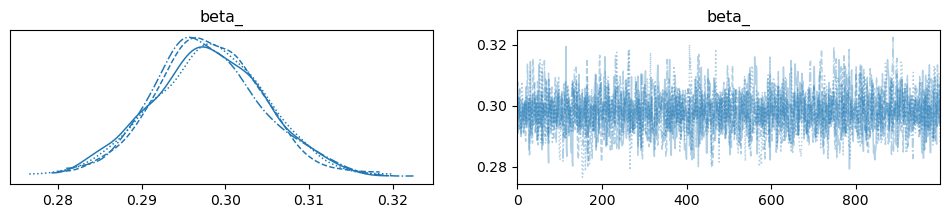

In [33]:
samples = az.from_cmdstanpy(samples)
az.plot_trace(samples) # shows the chains and the distribution

In [34]:
bokeh.io.show(
    iqplot.histogram(
        samples.posterior['beta_'].values.ravel()
    )
)